In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import integrate
from tqdm import tqdm

$$ y(t)=t,  \ -1 < t < 1  $$

$$ y(t) = \left\{ \begin{array}{cc}
1 & -1 < t < 0 \\
0 &  0 < t < 1 \\
\end{array}
\right.
$$

In [21]:
def f(t):
    return t**3
    
    return np.piecewise( t, [t < 0, t >= 0], [lambda t:1,lambda t:0] )

In [25]:
def GetFourier(t,T,N):
    
    y = t
    
    a0, error0 = integrate.quad( lambda t: f(t), -0.5*T, 0.5*T )
    a0 *= 2./T
    
    y = a0/2
    
    for n in tqdm(range(1, N)):
        an, erroran = integrate.quad( lambda t: f(t)*np.cos( (2*np.pi*n*t)/T ), -0.5*T, 0.5*T)
        bn, errorbn = integrate.quad( lambda t: f(t)*np.sin( (2*np.pi*n*t)/T ), -0.5*T, 0.5*T)
        
        y += 2*an*np.cos( (2*np.pi*n*t)/T )/T + 2*bn*np.sin( (2*np.pi*n*t)/T )/T 
    
    return y

In [23]:
t = np.arange(-1,1,0.001)
y = GetFourier(t,2,80)

100%|██████████| 79/79 [00:00<00:00, 353.94it/s]


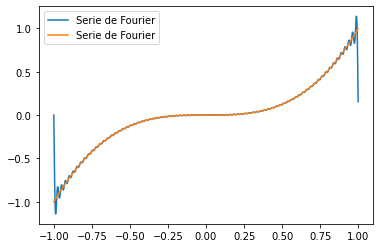

In [24]:
fig = plt.figure()
plt.plot(t,y, label='Serie de Fourier')
plt.plot(t,f(t), label='Serie de Fourier')
plt.legend(loc=0)